# 1. Import Libraries

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import seaborn as sns


# 2. Import the Dataset

In [3]:
try:
    df = pd.read_csv('Dataset/cleaned_dataset.csv')
except FileNotFoundError:
    print("File not found. Please check the file path.")
except Exception as e:
    print(f"An error occurred: {e}")

In [5]:
df.head()

,ID,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,...,Payment_of_Min_Amount,Total_EMI_per_month,Occupation_Encoded,Monthly_Inhand_Salary_Winsorized,Credit_Mix_Encoded,Outstanding_Debt_Winsorized,Amount_Invested_Monthly_Clean,Payment_Behaviour_Encoded,Monthly_Balance_Cleaned,Credit_Score_Encoded
0,0,19114.12,3,4,3,4,3,7,11.27,4.0,...,1,49.574949,13,1824.843333,1,809.98,80,2,312.0,2
1,1,19114.12,3,4,3,4,-1,0,11.27,4.0,...,1,49.574949,13,3093.745000,2,809.98,118,3,284.0,2
2,2,19114.12,3,4,3,4,3,7,9.25,4.0,...,1,49.574949,13,3093.745000,2,809.98,81,4,331.0,2
3,3,19114.12,3,4,3,4,5,4,6.27,4.0,...,1,49.574949,13,3093.745000,2,809.98,199,5,223.0,2
4,4,19114.12,3,4,3,4,6,0,11.27,4.0,...,1,49.574949,13,1824.843333,2,809.98,41,1,341.0,2


# 3. Make Model using simple Decision Tree

- Making a model based on the best parameters found in Headline 3.1. using GridSearchCV

Validation Accuracy: 0.7907

Validation Set Classification Report:
              precision    recall  f1-score   support

        Poor       0.80      0.80      0.80      5799
    Standard       0.82      0.81      0.81     10635
        Good       0.70      0.73      0.71      3566

    accuracy                           0.79     20000
   macro avg       0.77      0.78      0.78     20000
weighted avg       0.79      0.79      0.79     20000

Test Accuracy: 0.7922

Test Set Classification Report:
              precision    recall  f1-score   support

        Poor       0.79      0.80      0.80      5800
    Standard       0.82      0.81      0.81     10635
        Good       0.71      0.73      0.72      3565

    accuracy                           0.79     20000
   macro avg       0.77      0.78      0.78     20000
weighted avg       0.79      0.79      0.79     20000



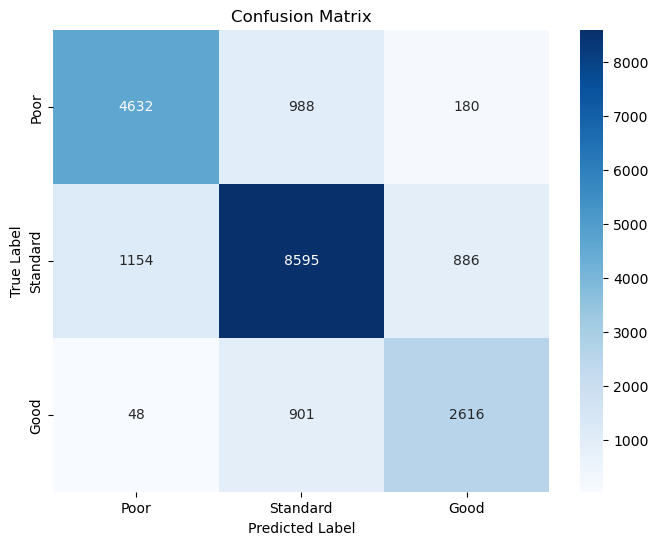

In [11]:
# Assign features and target
X, y = df.drop('Credit_Score_Encoded', axis=1), df['Credit_Score_Encoded']

# Split the data into training, validation, and test sets (60%, 20%, 20%)
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.4, random_state=42, stratify=y
)

X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp
)

# Train simple decision tree model based on best parameters by GridSearchCV
# {'criterion': 'entropy', 'max_depth': 20, 'max_features': 'None', 'min_samples_leaf': 2, 'min_samples_split': 5}
classifier = DecisionTreeClassifier(criterion='entropy', max_depth=20, max_features=None, min_samples_leaf=2, min_samples_split=5)
classifier.fit(X_train, y_train)

# Evaluate on validation set
y_val_pred = classifier.predict(X_val)
val_accuracy = accuracy_score(y_val, y_val_pred)
print(f"Validation Accuracy: {val_accuracy:.4f}")

# Check performance for validation set
print("\nValidation Set Classification Report:")
print(classification_report(y_val, y_val_pred, 
                           target_names=['Poor', 'Standard', 'Good']))

# Evaluate on Test set
y_test_pred = classifier.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy: {test_accuracy:.4f}")

# Check performance for test set
print("\nTest Set Classification Report:")
print(classification_report(y_test, y_test_pred, 
                           target_names=['Poor', 'Standard', 'Good']))

# Confusion matrix result
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Poor', 'Standard', 'Good'],
            yticklabels=['Poor', 'Standard', 'Good'])
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

- Model output confusion matrix is acceptable considering the size of the Dataset.
- To improve the model, we can further Analyze the dataset and add new features in hopes of increasing the accuracy.

# 3.1. Using GridSearchCV to find the best parameters

- Determining the best parameters for the decision tree model using GridSearchCV.

In [9]:
X, y = df.drop('Credit_Score_Encoded', axis=1), df['Credit_Score_Encoded']

# Split the data into training, and test sets (80%, 20%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

# Efficient Decision Tree parameter grid
param_grid = {
    'max_depth': [3, 5, 7, 10, 15, 20, None],
    'min_samples_split': [2, 5, 10, 15, 20],
    'min_samples_leaf': [1, 2, 5, 10, 15],
    'criterion': ['gini', 'entropy'],
    'max_features': ['auto', 'sqrt', 'log2', None]
}

# Initialize and train the model
model = DecisionTreeClassifier(random_state=42)
grid_search = GridSearchCV(model, param_grid, cv=3, scoring='accuracy', verbose=3)
grid_search.fit(X_train, y_train)
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)


Fitting 3 folds for each of 1400 candidates, totalling 4200 fits
[CV 1/3] END criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=2;, score=nan total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=2;, score=nan total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=2;, score=nan total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=5;, score=nan total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=5;, score=nan total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=5;, score=nan total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=10;, score=nan total time=   0.0s
[CV 2/3] E

c:\Users\basel\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
1050 fits failed out of a total of 4200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1050 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\basel\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\basel\anaconda3\Lib\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
    ~~~~~~~~~~~~~~~~~~~~~~~~~~^^
  File "c:\Users\basel\anaconda3\Lib\site-packages\sklearn\base.py", line 436, in _validate_param

Best Parameters: {'criterion': 'entropy', 'max_depth': 20, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 5}
Best Score: 0.7900250483724874


- We find the best score was 0.79 (~79%) for the best model.
- Best parameters are: {'criterion': 'entropy', 'max_depth': 20, 'max_features': 'None', 'min_samples_leaf': 2, 'min_samples_split': 5}

# 4. Make Model using simple Decision Tree

# 4.1. Implementing Model without Hyperparameter Tuning

Training set: 60000 samples
Validation set: 20000 samples
Test set: 20000 samples
Validation Accuracy: 0.8266

Validation Set Classification Report:
              precision    recall  f1-score   support

        Poor       0.83      0.82      0.82      5799
    Standard       0.83      0.86      0.84     10635
        Good       0.81      0.75      0.78      3566

    accuracy                           0.83     20000
   macro avg       0.82      0.81      0.81     20000
weighted avg       0.83      0.83      0.83     20000

Test Accuracy: 0.8283

Test Set Classification Report:
              precision    recall  f1-score   support

        Poor       0.83      0.83      0.83      5800
    Standard       0.83      0.86      0.85     10635
        Good       0.81      0.73      0.77      3565

    accuracy                           0.83     20000
   macro avg       0.82      0.81      0.81     20000
weighted avg       0.83      0.83      0.83     20000



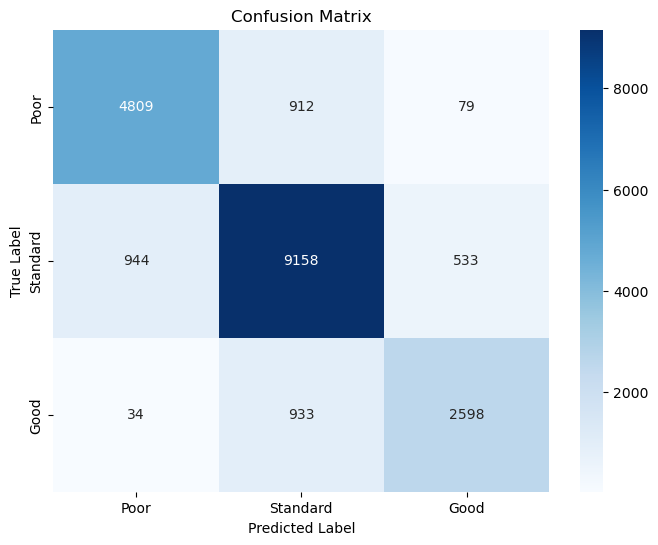

In [ ]:
# Assign features and target
X, y = df.drop('Credit_Score_Encoded', axis=1), df['Credit_Score_Encoded']

# Split the data into training, validation, and test sets (60%, 20%, 20%)
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.4, random_state=42, stratify=y
)

X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp
)

print(f"Training set: {X_train.shape[0]} samples")
print(f"Validation set: {X_val.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")

# Initialize and train the model
model = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    class_weight='balanced'  # Important for imbalanced classes
)

model.fit(X_train, y_train)

# Evaluate on validation set
y_val_pred = model.predict(X_val)
val_accuracy = accuracy_score(y_val, y_val_pred)
print(f"Validation Accuracy: {val_accuracy:.4f}")

# Check performance by class
print("\nValidation Set Classification Report:")
print(classification_report(y_val, y_val_pred, 
                           target_names=['Poor', 'Standard', 'Good']))

# If satisfied with validation performance, evaluate on test set
y_test_pred = model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy: {test_accuracy:.4f}")

print("\nTest Set Classification Report:")
print(classification_report(y_test, y_test_pred, 
                           target_names=['Poor', 'Standard', 'Good']))

# Confusion matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Poor', 'Standard', 'Good'],
            yticklabels=['Poor', 'Standard', 'Good'])
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

- Using Random Forest Classifier model without any hyperparameter tuning already gives us an accuracy of 0.82 (~82%) for the test set, which is almost equal to and better than our simple decision tree model with hyperparameter tuning.

- By running GridSearchCV, we see the best results:
1. Best Parameters: {'bootstrap': True, 'max_depth': None, 'max_features': 'sqrt', 'max_samples': 1.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
2. Best Score: 0.8258250011955853 (~82%)